In [1]:
!pip install -e ../.

Obtaining file:///Users/lorcan/code/Awle/exo-hunter
  Preparing metadata (setup.py) ... done


  Attempting uninstall: exo-hunter
    Found existing installation: exo-hunter 1.0
    Uninstalling exo-hunter-1.0:
      Successfully uninstalled exo-hunter-1.0
  Running setup.py develop for exo-hunter


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from ExoHunter.params import *
from ExoHunter.cleaner import Cleaner
from ExoHunter.formatter import Formatter

/Users/lorcan/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
def get_kaggle_data(data_name='kaggle', test_size=0.2, drive=0):
    train_path = os.path.join(DRIVE[drive], 'raw_data', data_name, FILEPATHS[data_name][0])
    test_path = os.path.join(DRIVE[drive], 'raw_data', data_name, FILEPATHS[data_name][1])
    train_data = pd.read_csv(train_path)
    data_test = pd.read_csv(test_path)
    data_train, data_val = train_test_split(train_data, test_size=test_size)
    return data_train, data_val, data_test

In [4]:
def min_window(data):
    temp = data.drop(columns='LABEL').T
    minim = temp[temp>-660].count().min()
    return minim

In [5]:
def get_nasa_data(data_name='nasa', test_size=0.2, drive=0):
    exo_path = os.path.join(DRIVE[drive], 'raw_data', data_name, FILEPATHS[data_name][0][0])
    non_exo_path = os.path.join(DRIVE[drive], 'raw_data', data_name, FILEPATHS[data_name][0][1])
    
    exo_data = pd.read_csv(exo_path)
    non_exo_data = pd.read_csv(non_exo_path)
    exo_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
    non_exo_data.drop(columns=['Unnamed: 0'], inplace=True)
    
    exo_data = exo_data.T
    non_exo_data = non_exo_data.T
    exo_data[['LABEL']] = 2
    non_exo_data[['LABEL']] = 1
    
    all_data = pd.concat([exo_data, non_exo_data])
    minim = min_window(all_data)
    print(minim)
    
    labels = all_data[['LABEL']]
    all_data = all_data.iloc[:, :minim]
    all_data[['LABEL']] = labels
    
    train_data, test_data = train_test_split(all_data, test_size=test_size)

    return train_data, test_data

In [6]:
def get_raw_data(data_name='nasa', test_size=0.2, drive=0):
    if data_name == 'kaggle':
        return get_kaggle_data(test_size=test_size, drive=drive)
    if data_name == 'nasa':
        return get_nasa_data(test_size=test_size, drive=drive)
    return None

In [7]:
def get_proc_data(data_name='nasa', test_size=0.2, drive=0):
    train_path = os.path.join(DRIVE[drive],'processed_data', data_name, FILEPATHS[data_name][1][0])
    test_path = os.path.join(DRIVE[drive],'processed_data', data_name, FILEPATHS[data_name][1][1])
    if data_name=='nasa':
        train_data = pd.read_csv(train_path, index_col='Index')
        data_test = pd.read_csv(test_path, index_col='Index')
    else:
        train_data = pd.read_csv(train_path)
        data_test = pd.read_csv(test_path)
    
    return train_data, data_test

In [8]:
def get_data(data_name='nasa', test_size=0.2, drive=0, raw=0):
    if raw:
        return get_raw_data(data_name, test_size, drive)
    return get_proc_data(data_name, test_size, drive)

In [9]:
def get_Xy(data):
        X = data.drop(columns='LABEL')
        y = data['LABEL'].map({1:0, 2:1})
        return X, y

In [10]:
cleaner = Cleaner()

In [11]:
train_nasa, test_nasa = cleaner.get_data()

In [12]:
train_raw_nasa, test_raw_nasa = cleaner.get_data('nasa', 0.1, 0, 1)

In [13]:
train_raw_kaggle, test_raw_kaggle = cleaner.get_data('kaggle', 0.2, 0, 1)

In [14]:
# FILEPATHS = {
#     'kaggle': ['exoTrain.csv', 'exoTest.csv'],
#     'nasa': [['nasa_exo_wo_label_df.csv', 'nasa_non_exo_wo_label_df.csv'], ['nasaTrain.csv', 'nasaTest.csv']]
# }
# train_nasa, test_nasa = get_data()

In [15]:
train_raw_nasa

,0,1,2,3,4,5,6,7,8,9,...,18412,18413,18414,18415,18416,18417,18418,18419,18420,LABEL
7368664flux,0.999888,1.000131,1.000272,1.000299,0.999787,1.000262,1.000614,1.000467,0.999826,1.000442,...,1.000203,0.999744,0.999907,1.000145,0.999677,0.999839,1.000048,0.999753,0.999935,2
9141355flux,0.999319,1.000349,0.999739,1.000310,1.000313,0.999507,1.000638,1.000760,1.000065,1.000149,...,0.999426,1.000283,0.999560,0.999223,0.999830,0.999607,0.999198,1.000465,1.000325,2
7100673flux,0.999772,0.999884,0.999824,0.999841,0.999752,0.999855,0.999807,0.999764,0.999785,0.999843,...,1.000169,1.000153,1.000289,1.000135,0.999979,0.999984,1.000103,1.000068,1.000180,2
5272878flux,1.000177,0.999721,1.000074,1.000864,0.999500,1.000099,0.999923,0.999721,0.999982,0.999879,...,0.999266,0.999762,0.999313,0.999914,0.999946,0.999742,1.000068,0.999749,0.999596,2
1028018flux,1.003466,0.989630,0.983939,0.978806,0.975305,0.976150,0.978267,0.980107,0.982123,0.986203,...,1.007534,1.003324,0.996514,0.988048,0.980892,0.975606,0.972717,0.972211,0.972380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434976flux,1.000382,0.999815,0.999318,0.999787,0.999650,1.000281,0.999589,0.999758,0.999202,0.999835,...,0.999687,0.999386,0.999651,0.999230,0.999700,0.999232,0.999472,0.999307,0.998836,1
7510820flux,1.004603,0.999765,1.000261,1.000046,1.000180,1.001517,0.999756,0.999032,1.000617,1.000010,...,0.999167,0.998986,0.999369,0.999245,0.998759,0.999028,0.999227,0.999223,0.999742,2
5631630flux,0.999680,0.999843,0.999512,0.999696,0.999644,0.999461,0.999431,0.999528,0.999567,0.999709,...,1.000082,1.000150,0.999899,0.999891,0.999928,0.999614,1.000109,0.999809,0.999783,2
7678434flux,1.006193,1.006202,1.005997,1.005702,1.006004,1.005665,1.005913,1.005943,1.006480,1.005553,...,0.999742,0.999132,1.000153,0.999990,0.999661,0.999958,1.000022,0.999826,0.999772,2


In [16]:
train_raw_kaggle

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [17]:
train_data, test_data = get_data(raw=1)

18421


In [20]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,18412,18413,18414,18415,18416,18417,18418,18419,18420,LABEL
7703955flux,0.999911,0.999634,0.999850,1.000138,0.999678,1.000373,0.999939,0.999701,1.000398,0.999982,...,1.000691,1.000435,1.000540,1.000652,1.000640,0.999642,1.001214,1.000422,1.000112,2
1724968flux,0.992700,0.996649,0.991999,0.987136,0.992153,0.989649,0.987952,0.993652,0.991401,0.987990,...,1.279322,1.275958,1.274413,1.279116,1.272044,1.271530,1.272767,1.268466,1.265818,1
7691260flux,0.999954,0.999983,1.000071,1.000353,1.000191,0.999948,0.999853,1.000474,1.000228,1.000015,...,1.000446,1.000344,1.000439,1.000250,1.000196,1.000575,1.000068,1.000270,1.000020,2
893647flux,0.989589,0.988356,0.987302,0.986550,0.987230,0.988992,0.986935,0.986460,0.987010,0.986708,...,0.981789,0.983036,0.982843,0.983236,0.983212,0.983382,0.983754,0.983079,0.983504,1
1028012flux,1.000407,1.000127,1.000103,1.000204,1.000390,1.000407,1.000125,1.000118,1.000037,1.000278,...,0.999958,1.000043,1.000132,0.999712,0.999901,1.000044,0.999883,1.000116,0.999824,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163991flux,1.000381,0.999830,1.000271,1.000114,1.000112,1.000075,0.999869,1.000333,1.000314,0.999680,...,0.999150,0.999928,1.000017,0.999719,0.999983,0.999887,1.000072,0.999731,1.000132,1
1027110flux,0.994809,0.995083,0.995236,0.995438,0.995612,0.995765,0.995986,0.996215,0.996426,0.996444,...,0.998778,0.998969,0.998988,0.999219,0.999186,0.999278,0.999392,0.999459,0.999621,1
3442055flux,0.999913,0.999761,0.999625,0.999733,0.999575,0.999706,0.999872,1.000211,0.999662,0.999460,...,1.000063,0.999859,0.999981,1.000072,1.000103,1.000078,0.999740,1.000137,0.999829,2
1872340flux,0.990072,0.990253,0.990167,0.990199,0.990143,0.989766,0.990193,0.990132,0.990302,0.990008,...,1.074853,1.075467,1.075898,1.076409,1.077030,1.077055,1.077608,1.077936,1.078560,2


In [21]:
plt.plot(X_train.iloc[700])

NameError: name 'X_train' is not defined

In [ ]:
# exo_data.shape, non_exo_data.shape

In [ ]:
# all_data = pd.concat([exo_data, non_exo_data])

In [ ]:
temp2 = temp[temp>-660].count()

In [ ]:
min_length_frac = temp2[temp2==minim].count()/all_data.shape[0]

In [ ]:
majority_frac = temp2[temp2==18422].count()/all_data.shape[0]+temp2[temp2==18421].count()/all_data.shape[0]

In [ ]:
snip_len = 18422

In [ ]:
cols = [
    'Min snippet length',
    'Fraction of samples of min snippet length',
    'Fraction of samples of min snippet length+1||min snippet length',
    'Fraction of samples of greater length',
    'Chosen snippet length'
]
dats = [
    minim,
    min_length_frac,
    majority_frac,
    1-majority_frac,
    snip_len
]

In [ ]:
pd.DataFrame(dats, index=cols)

In [ ]:
# minim = temp[temp>-660].count().min()
# train_raw_nasa.to_csv('../nasaTrain.csv', index=True, index_label='KepID')
# test_raw_nasa.to_csv('../nasaTest.csv', index=True, index_label='KepID')

In [22]:
!pip install pyts

In [23]:
DEFAULT_LEN = 18421

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ExoHunter.cleaner import Cleaner
from ExoHunter.formatter import Formatter
from ExoHunter.params import *

cleaner = Cleaner()
formatter = Formatter()

train_data, test_data = cleaner.get_data(drive=0)

X, y = cleaner.get_Xy(train_data)

In [25]:
def random_selector(data):
    desired_len = np.random.randint(2000, 6000)
    X = data.drop(columns='LABEL')
    y = data['LABEL']
    rand_upper = DEFAULT_LEN-desired_len
    lower = np.random.randint(0, rand_upper)
    X_ = X.sample(frac=1)
    X_ = X_.iloc[:,lower:lower+desired_len]
    data_ = X_.join(y)
    return data_

In [26]:
X_selected = random_selector(train_data)
X_selected

,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,...,4691,4692,4693,4694,4695,4696,4697,4698,4699,LABEL
KepID,,,,,,,,,,,,,,,,,,,,,
1025494flux,1.000141,1.000009,0.999924,1.000217,1.000086,1.000013,0.999997,0.999927,0.999917,1.000034,...,0.999902,1.000141,0.999954,0.999889,1.000006,0.999824,0.999909,0.999898,0.999912,1
1025578flux,0.999841,1.000183,0.999323,0.999511,0.999590,1.000685,0.999597,0.999844,1.000122,0.999636,...,1.000320,1.000654,0.999911,1.000542,1.000493,0.999695,0.999337,0.999268,1.000259,1
1025986flux,1.002795,1.002696,1.002563,1.002606,1.002443,1.002382,1.002136,1.002080,1.001936,1.001899,...,1.001126,1.001023,1.000897,1.000673,1.000589,1.000427,1.000290,1.000219,0.999992,1
1026032flux,0.971585,0.975260,0.982913,0.990929,0.997323,1.000134,1.000524,1.000483,1.000469,1.001026,...,0.998661,0.998474,0.998323,0.999058,0.998154,0.999077,0.998059,0.998743,0.998687,1
1026133flux,0.999877,0.999895,0.999553,0.999871,0.999946,0.999794,0.999776,0.999974,1.000173,0.999902,...,1.000180,1.000174,1.000088,1.000050,1.000251,1.000147,1.000120,1.000001,1.000196,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9146018flux,0.999928,0.999775,1.000137,0.999824,0.999732,0.999856,1.000171,1.000440,0.999997,1.000265,...,1.000195,0.999808,1.000120,0.999851,1.000199,1.000107,1.000245,0.999994,1.000099,2
9153570flux,1.000884,1.002019,1.002741,1.002179,1.002159,1.001124,1.001705,1.002695,1.002314,1.002022,...,0.999866,1.000459,1.000787,1.000747,1.001173,1.001380,1.002023,1.001465,1.002220,2
9157634flux,1.000161,1.000175,0.999647,0.999960,0.999645,0.999739,1.000001,0.999786,0.999574,0.999742,...,0.999917,1.000428,1.000347,0.999977,1.000017,0.999926,0.999946,1.000033,1.000106,2


In [27]:
def selection_to_csv(data, n):
    X_selected = random_selector(data)
    X_selected.to_csv(f'../processed_data/nasa/nasaSelect{n}.csv', index=True, index_label='KepID')

In [28]:
# for n in range(10):
#     print(f'Writing CSV no.{n}')
#     selection_to_csv(train_data, n)

In [34]:
X_select0 = pd.read_csv('../processed_data/nasa/nasaSelect0.csv', index_col='KepID')

<AxesSubplot:ylabel='1025494flux'>

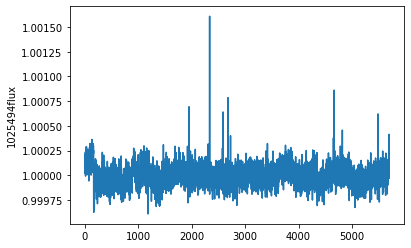

In [45]:
import seaborn as sns
sns.lineplot(y=X_select0.iloc[0], x=np.arange(0, len(X_select0.iloc[0]), 1))

In [44]:
import plotly.express

array([   0,    1,    2, ..., 5694, 5695, 5696])